# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | sultanpur
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | urambo
Processing Record 6 of Set 1 | fale old settlement
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | rochester
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | buka
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | berdigestyakh
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | yonggwang-up
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | a

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.62,88,86,7.81,PN,1727315510
1,sultanpur,26.2667,82.0667,25.45,87,100,4.98,IN,1727315511
2,nemuro,43.3236,145.5750,16.82,84,100,5.68,JP,1727315512
3,iqaluit,63.7506,-68.5145,5.85,81,75,1.03,CA,1727315514
4,urambo,-5.0667,32.0500,20.87,49,72,1.53,TZ,1727315515


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.62,88,86,7.81,PN,1727315510
1,sultanpur,26.2667,82.0667,25.45,87,100,4.98,IN,1727315511
2,nemuro,43.3236,145.5750,16.82,84,100,5.68,JP,1727315512
3,iqaluit,63.7506,-68.5145,5.85,81,75,1.03,CA,1727315514
4,urambo,-5.0667,32.0500,20.87,49,72,1.53,TZ,1727315515


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

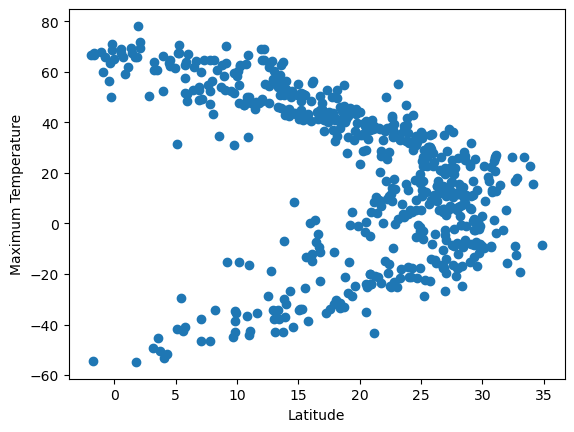

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

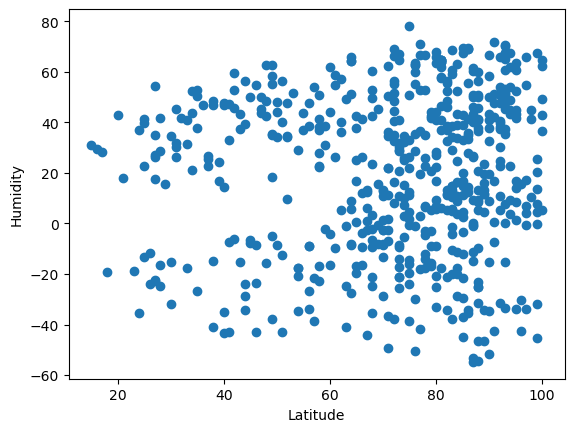

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

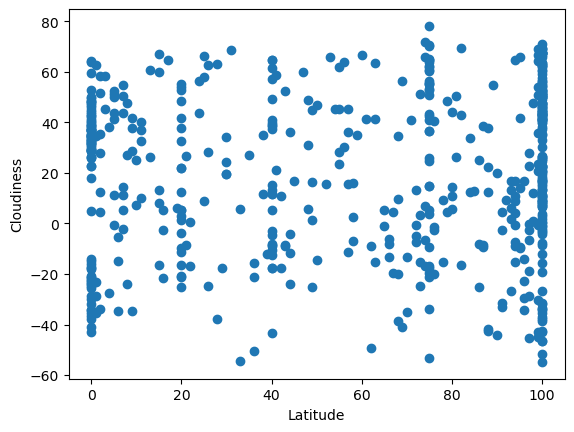

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

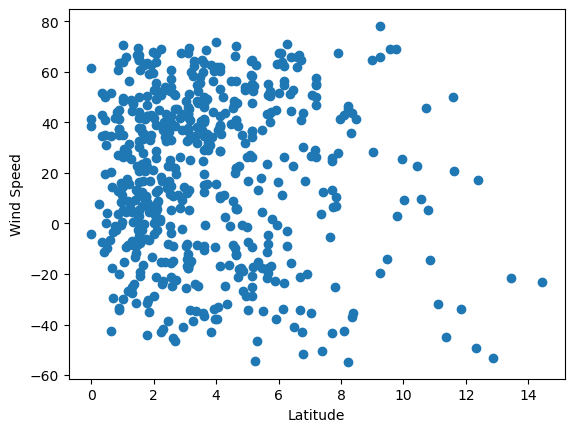

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nh_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
nh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sultanpur,26.2667,82.0667,25.45,87,100,4.98,IN,1727315511
2,nemuro,43.3236,145.5750,16.82,84,100,5.68,JP,1727315512
3,iqaluit,63.7506,-68.5145,5.85,81,75,1.03,CA,1727315514
7,thompson,55.7435,-97.8558,16.09,82,75,2.06,CA,1727315518
9,rochester,43.1548,-77.6156,19.69,87,75,3.09,US,1727315402


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sh_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
sh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.62,88,86,7.81,PN,1727315510
4,urambo,-5.0667,32.0500,20.87,49,72,1.53,TZ,1727315515
5,fale old settlement,-9.3852,-171.2468,28.38,73,95,3.98,TK,1727315516
6,ancud,-41.8697,-73.8203,5.13,77,88,2.29,CL,1727315320
8,port-aux-francais,-49.3500,70.2167,3.17,71,62,12.33,TF,1727315519


The r-value is: -0.8303920895797275


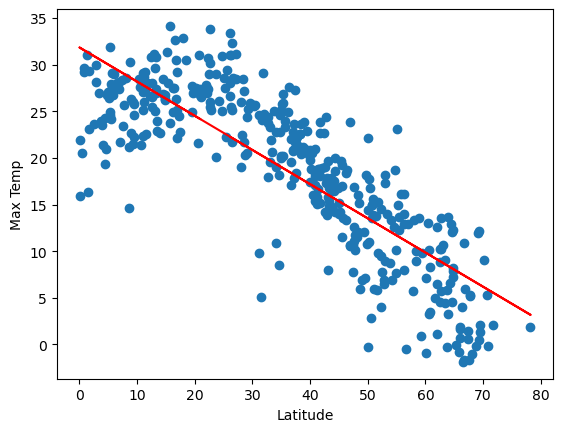

In [28]:
# Linear regression on Northern Hemisphere

linear_regress(nh_df["Lat"].rename("Latitude"), nh_df["Max Temp"], (10, -30))

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7743440736523648


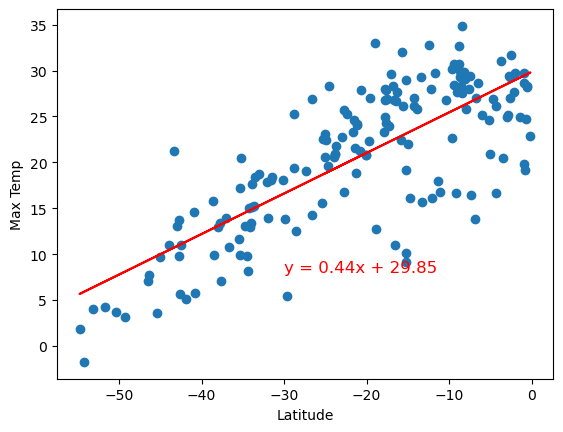

In [29]:
# Linear regression on Southern Hemisphere
linear_regress(sh_df["Lat"].rename("Latitude"), sh_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 
- There is a sharp negative regression of the northern hamisphere of max temperature and latitude with the correlation coefficient of -0.7825513230046437
- There is a sharp positive regression of the southern hamisphere of max temperature and latitude with the correlation coefficient of 0.06951634024533657

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.027039539661262012


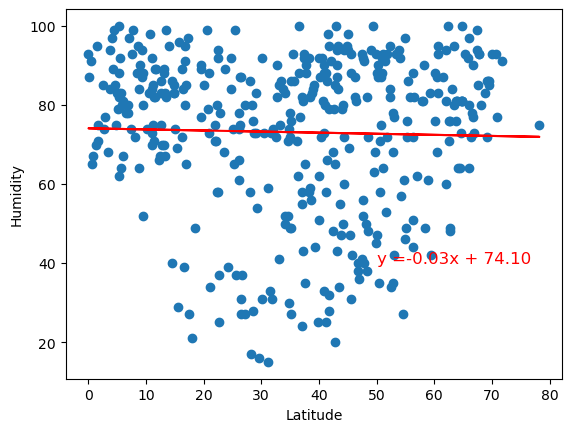

In [24]:
# Northern Hemisphere
linear_regress(nh_df["Lat"].rename("Latitude"), nh_df["Humidity"], (50, 40))

The r-value is: -0.08021758603173926


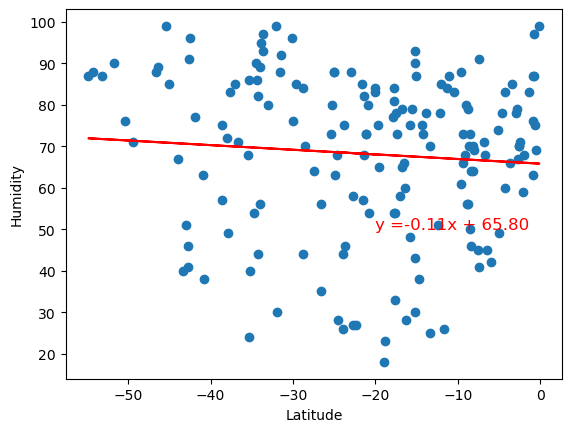

In [26]:
# Southern Hemisphere
linear_regress(sh_df["Lat"].rename("Latitude"), sh_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 

- There seems to have a mild negative regression of humidity in both northern and southern hamisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01413970821434177


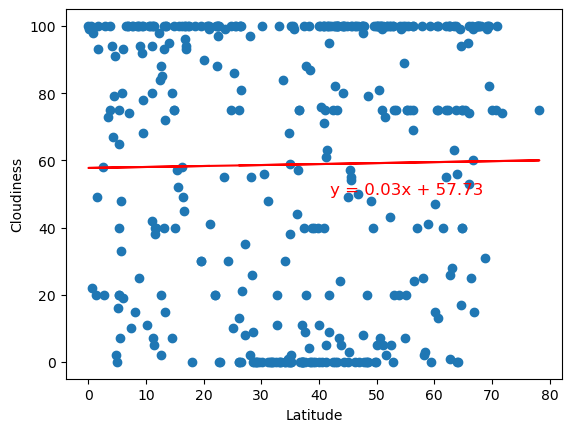

In [32]:
# Northern Hemisphere
linear_regress(nh_df["Lat"].rename("Latitude"), nh_df["Cloudiness"], (42, 50))

The r-value is: 0.010750922659966501


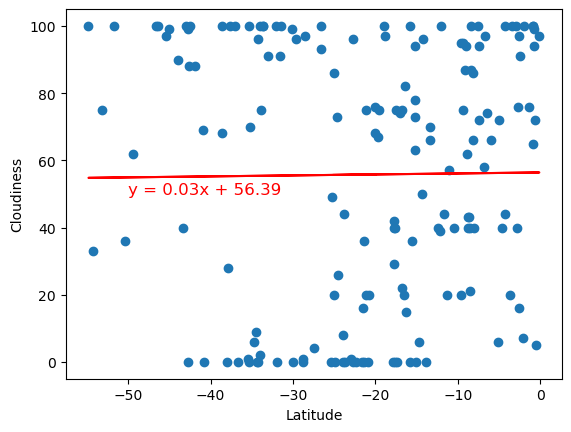

In [31]:
# Southern Hemisphere
linear_regress(sh_df["Lat"].rename("Latitude"), sh_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:**

- There seems to be a very mild positive linear regression for both the norther and southern hamisphere. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13573583239553338


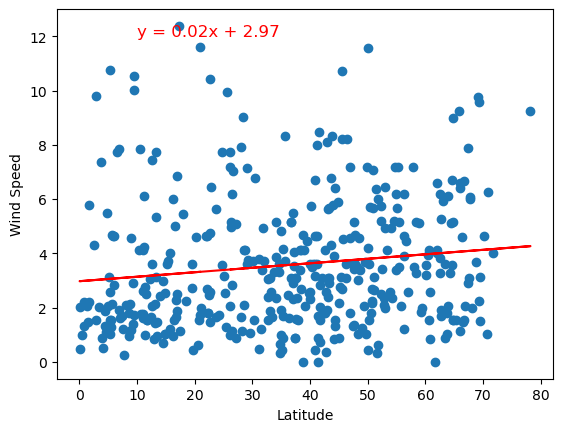

In [33]:
# Northern Hemisphere
linear_regress(nh_df["Lat"].rename("Latitude"), nh_df["Wind Speed"], (10, 12))

The r-value is: -0.3386143577396819


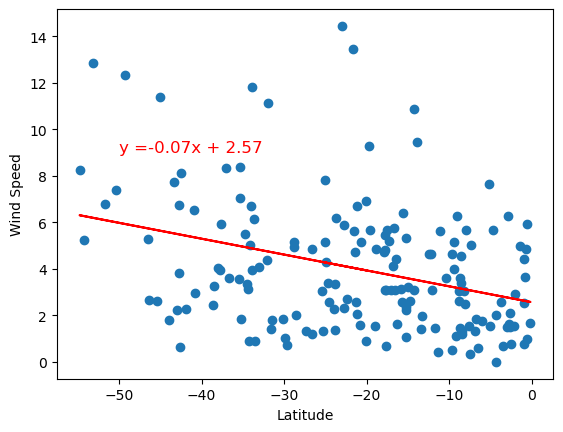

In [34]:
# Southern Hemisphere
linear_regress(sh_df["Lat"].rename("Latitude"), sh_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 

- Wind speed in the norther hamisphere has a positive regression with the correlation coefficient of 0.13573583239553338
- Wind speed in the southern hamisphere has a negative regression with the correlation coefficient of -0.3386143577396819
- The two graphs show that the higher the latitude, the higher the wind. The lower the latitude, the wind is lower. 
